In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [17]:
covariance = [[1, 0], [0, 1]]
N = 500
X1 = np.random.multivariate_normal([2, 2], covariance, N)
X2 = np.random.multivariate_normal([8, 3], covariance, N)
X3 = np.random.multivariate_normal([3, 6], covariance, N)
X = np.concatenate((X1, X2, X3))

In [18]:
def kmean_display():
    plt.figure(figsize=(6, 6))
    plt.plot(X1[:, 0], X1[:, 1], 'bo', markersize=4)
    plt.plot(X2[:, 0], X2[:, 1], 'r^', markersize=4)
    plt.plot(X3[:, 0], X3[:, 1], 'sg', markersize=4)
    plt.show()

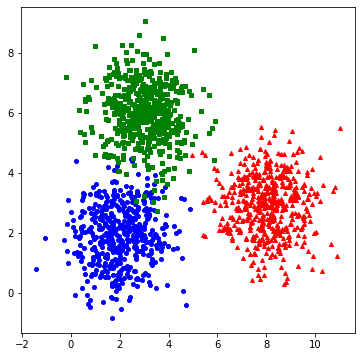

In [19]:
kmean_display()

In [20]:
def init_centers(X, k):
    return X[np.random.choice(3 * N, k, replace=False), :]

In [28]:
def get_new_label(X, m):
    new_labels_intdices = np.argmin(cdist(X, m), axis=1)
    new_labels = np.array(([0] * len(m)) * len(X)).reshape(-1, len(m))
    for i in range(len(new_labels)):
        new_labels[i][new_labels_intdices[i]] = 1
    return new_labels

In [36]:
def update_centers(X, labels, k):
    new_centers = np.zeros((k, len(X[0])))
    for i in range(len(new_centers)):
        tmpX = []
        for j in range(len(labels)):
            if labels[j].tolist().index(1) == i:
                tmpX.append(X[j])
        new_centers[i] = np.mean(tmpX, axis=0)
    return new_centers

In [23]:
def has_coveraged(cur_centers, new_centers):
    return np.all(cur_centers == new_centers)

In [46]:
def k_means(X, K):
    i_centers = init_centers(X, K)
    centers_history = [i_centers]
    labels = np.concatenate((N * [[1, 0, 0]], N * [[0, 1, 0]], N * [[0, 0, 1]]))
    while True:
        labels = get_new_label(X, centers_history[-1])
        new_centers = update_centers(X, labels, K)
        centers_history.append(new_centers)
        if has_coveraged(new_centers, centers_history[-2]):
            break
    return labels, centers_history

In [133]:
def display_result(X,labels, centers):
    X1 = np.array([X[i] for i, v in enumerate(labels) if labels[i] == 0 or np.all(labels[i] == [1, 0, 0])])
    X2 = np.array([X[i] for i, v in enumerate(labels) if labels[i] == 1 or np.all(labels[i] == [0, 1, 0])])
    X3 = np.array([X[i] for i, v in enumerate(labels) if labels[i] == 2 or np.all(labels[i] == [0, 0, 1])])
    plt.figure(figsize=(8, 8))
    plt.plot(X1[:, 0], X1[:, 1], 'bo', markersize=4)
    plt.plot(X2[:, 0], X2[:, 1], 'r^', markersize=4)
    plt.plot(X3[:, 0], X3[:, 1], 'sg', markersize=4)
    plt.show()

In [119]:
labels, centers = k_means(X, 3)

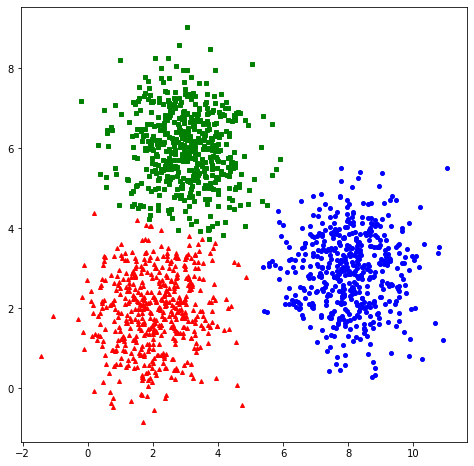

In [125]:
display_result(X, labels, centers)

In [126]:
from sklearn.cluster import KMeans

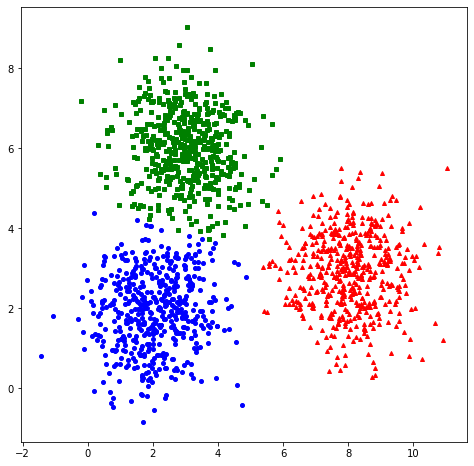

In [135]:
kmean = KMeans(n_clusters=3).fit(X)
lib_labels = kmean.predict(X)
lib_labels
display_result(X, lib_labels, kmean.cluster_centers_)

In [148]:
# np.amax(labels, axis=1)
labels
np.argmax(labels, axis=1)
X[np.where(np.argmax(labels, axis=1) == 1)]

array([[2.83286117, 2.147263  ],
       [1.97526458, 0.6843836 ],
       [2.71439996, 3.37802565],
       ...,
       [3.37232587, 3.01664221],
       [2.67314086, 3.04979946],
       [3.50193708, 3.7390139 ]])